In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/macbookpro13retina/Desktop/CAB/Python/Project_3_Capital_Bike_Share/CBS_2021-2023_Hourly_Weather.csv"

df_hourly = pd.read_csv(file_path)

df_hourly.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [2]:
missing_values_hourly = df_hourly.isnull().sum()

data_types_hourly = df_hourly.dtypes

basic_stats_hourly = df_hourly.describe()

missing_values_hourly, data_types_hourly, basic_stats_hourly

(Casual                     11
 Date                        0
 Hour                        0
 Member                     11
 Total_rides                11
 relativehumidity_2m (%)     0
 temperature_2m (°C)         0
 weathercode (wmo code)      0
 windspeed_10m (km/h)        0
 dtype: int64,
 Casual                     float64
 Date                        object
 Hour                         int64
 Member                     float64
 Total_rides                float64
 relativehumidity_2m (%)      int64
 temperature_2m (°C)        float64
 weathercode (wmo code)       int64
 windspeed_10m (km/h)       float64
 dtype: object,
              Casual          Hour        Member   Total_rides  \
 count  26269.000000  26280.000000  26269.000000  26269.000000   
 mean     159.930070     11.500000    247.165632    407.095702   
 std      167.330426      6.922318    225.283539    373.005409   
 min        0.000000      0.000000      0.000000      1.000000   
 25%       28.000000      5.750000  

In [3]:
# eksik verilerin tarihi neymiş bakalım

missing_data_rows = df_hourly[df_hourly.isnull().any(axis=1)]
missing_data_rows[['Date', 'Hour']]

,Date,Hour
21853,2021-01-21,3
21854,2021-01-22,3
21855,2021-02-02,3
21856,2021-02-03,2
21857,2021-02-09,1
21858,2021-02-19,2
21859,2021-02-19,3
21860,2021-03-14,2
21861,2022-01-04,2
21862,2022-03-13,2


In [ ]:
df_sorted_check = df_hourly[['Date', 'Hour']].head(20)
df_sorted_check

,Date,Hour
0,2021-01-01,0
1,2021-01-01,1
2,2021-01-01,2
3,2021-01-01,3
4,2021-01-01,4
5,2021-01-01,5
6,2021-01-01,6
7,2021-01-01,7
8,2021-01-01,8
9,2021-01-01,9


In [5]:
# Tarih sütununu datetime formatına çevirelim
df_hourly['Date'] = pd.to_datetime(df_hourly['Date'])

In [6]:
# Veri zaten sıralı mı? Kontrol edelim
is_sorted = (df_hourly[['Date', 'Hour']].values == df_hourly[['Date', 'Hour']].sort_values(by=['Date', 'Hour']).values).all()
print(is_sorted)
# Eğer sıralı değilse, tarih ve saate göre sıralayalım
if not is_sorted:
    df_hourly = df_hourly.sort_values(by=['Date', 'Hour']).reset_index(drop=True)


False


In [7]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26269 non-null  float64       
 1   Date                     26280 non-null  datetime64[ns]
 2   Hour                     26280 non-null  int64         
 3   Member                   26269 non-null  float64       
 4   Total_rides              26269 non-null  float64       
 5   relativehumidity_2m (%)  26280 non-null  int64         
 6   temperature_2m (°C)      26280 non-null  float64       
 7   weathercode (wmo code)   26280 non-null  int64         
 8   windspeed_10m (km/h)     26280 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 1.8 MB


In [8]:
# Öncelikle tarih ve saat bilgilerini datetime formatına çevirelim
df_hourly['Datetime'] = pd.to_datetime(df_hourly['Date'].astype(str) + ' ' + df_hourly['Hour'].astype(str) + ':00:00')

# Tüm olası tarih ve saat kombinasyonlarını oluştur
full_time_range = pd.date_range(start=df_hourly['Datetime'].min(), end=df_hourly['Datetime'].max(), freq='H')

# Yeni eksiksiz bir dataframe oluşturalım
full_time_df_hourly = pd.DataFrame({'Datetime': full_time_range})

# Ana veri seti ile birleştirme (left join)
df_full_hourly = full_time_df_hourly.merge(df_hourly, on='Datetime', how='left')

# Eksik değerleri sıfır ile dolduralım
df_full_hourly.fillna(0, inplace=True)

# Tarih ve saatleri tekrar ayıralım
df_full_hourly['Date'] = df_full_hourly['Datetime'].dt.date
df_full_hourly['Hour'] = df_full_hourly['Datetime'].dt.hour

# Gereksiz datetime sütununu kaldıralım
df_full_hourly.drop(columns=['Datetime'], inplace=True)


/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_21831/2488648028.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_range = pd.date_range(start=df_hourly['Datetime'].min(), end=df_hourly['Datetime'].max(), freq='H')


In [9]:
missing_data_rows = df_hourly[df_hourly.isnull().any(axis=1)]
missing_data_rows[['Date', 'Hour']]

,Date,Hour
483,2021-01-21,3
507,2021-01-22,3
771,2021-02-02,3
794,2021-02-03,2
937,2021-02-09,1
1178,2021-02-19,2
1179,2021-02-19,3
1730,2021-03-14,2
8834,2022-01-04,2
10466,2022-03-13,2


In [10]:
missing_data_rows = df_full_hourly[df_full_hourly.isnull().any(axis=1)]
missing_data_rows

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)


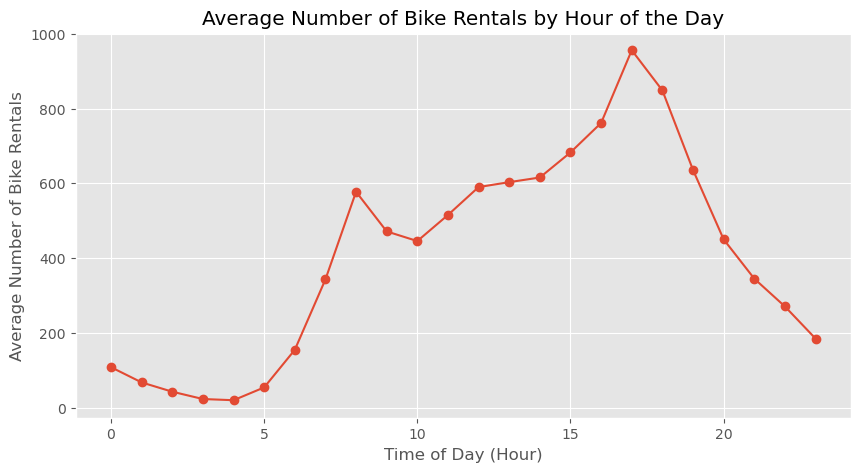

In [11]:
import seaborn as sns

# Görselleştirme stillerini ayarlayalım
plt.style.use('ggplot')

# 1. Genel Bisiklet Kullanımı Trendleri (Saatlik Ortalama)
hourly_trends = df_full_hourly.groupby("Hour")["Total_rides"].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly_trends.index, hourly_trends.values, marker='o', linestyle='-')
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Average Number of Bike Rentals")
plt.title("Average Number of Bike Rentals by Hour of the Day")
plt.grid(True)
plt.show()

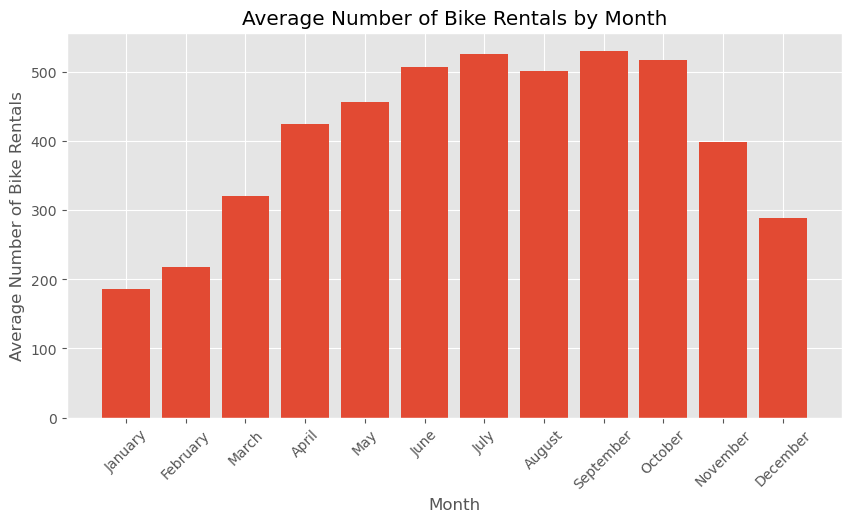

In [12]:
# 2. Mevsimsel Bisiklet Kullanımı
df_full_hourly['Month'] = pd.to_datetime(df_full_hourly['Date']).dt.month
monthly_trends = df_full_hourly.groupby("Month")["Total_rides"].mean()

plt.figure(figsize=(10, 5))
plt.bar(monthly_trends.index, monthly_trends.values)
plt.xlabel("Month")
plt.ylabel("Average Number of Bike Rentals")
plt.title("Average Number of Bike Rentals by Month")
plt.xticks(range(1, 13), ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45)
plt.show()

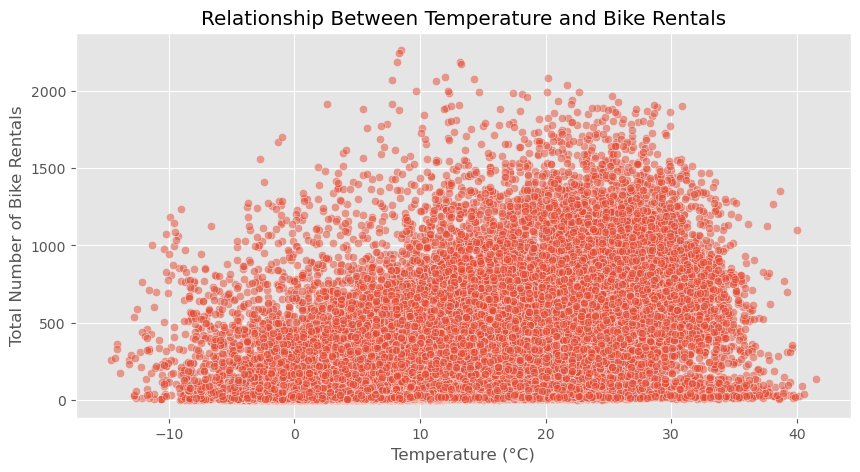

In [13]:
# 3. Hava Durumu ve Bisiklet Kullanımı İlişkisi
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_full_hourly["temperature_2m (°C)"], y=df_full_hourly["Total_rides"], alpha=0.5)
plt.xlabel("Temperature (°C)")
plt.ylabel("Total Number of Bike Rentals")
plt.title("Relationship Between Temperature and Bike Rentals")
plt.show()

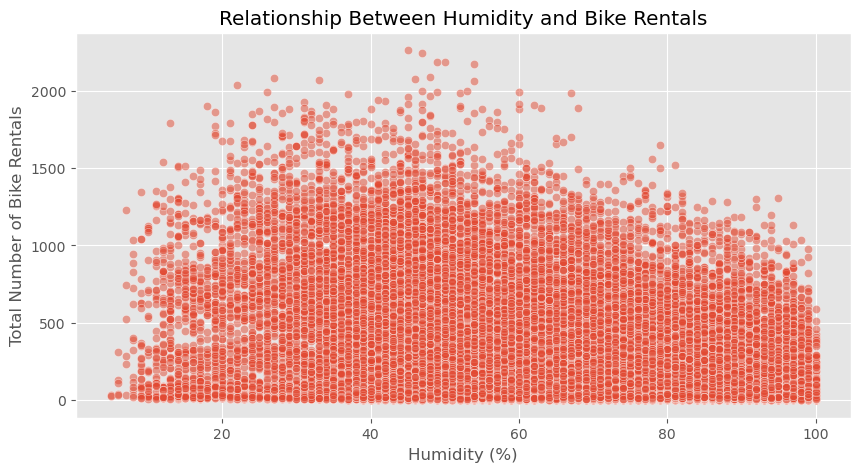

In [14]:
# 4. Nem Oranı ve Bisiklet Kullanımı
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_full_hourly["relativehumidity_2m (%)"], y=df_full_hourly["Total_rides"], alpha=0.5)
plt.xlabel("Humidity (%)")
plt.ylabel("Total Number of Bike Rentals")
plt.title("Relationship Between Humidity and Bike Rentals")
plt.show()

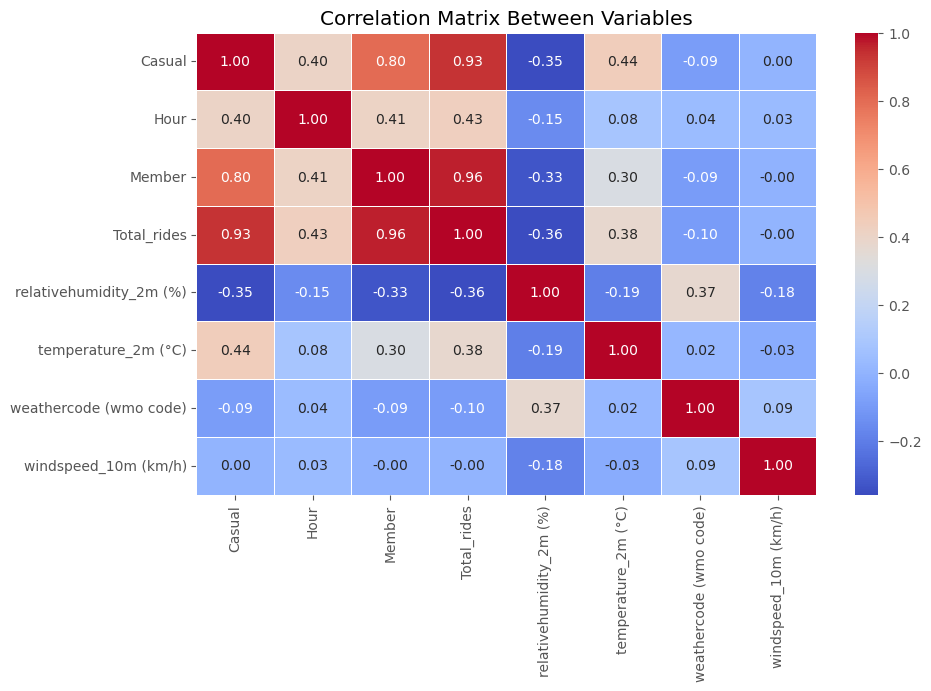

In [15]:
import numpy as np

# Sayısal değişkenleri seçelim (Date sütununu çıkaralım)
numeric_cols_hourly = df_hourly.select_dtypes(include=[np.number])

# Korelasyon matrisini hesaplayalım
correlation_matrix_hourly = numeric_cols_hourly.corr()

# Isı haritası ile korelasyonları görselleştirelim
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_hourly, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Between Variables")
plt.show()

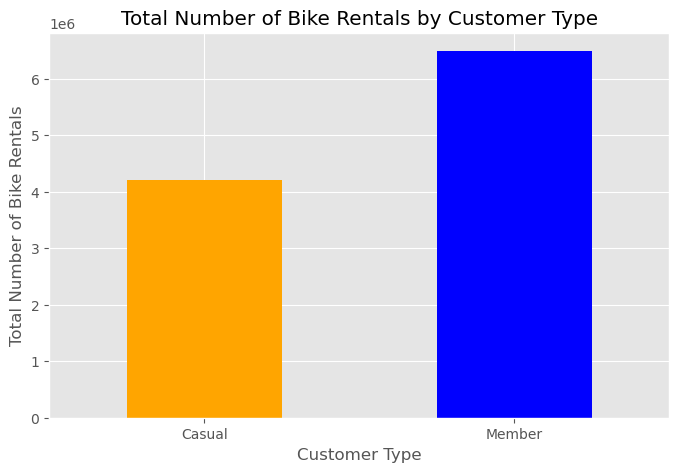

In [16]:
# Üye ve casual kullanıcıların toplam kiralama sayılarını hesaplayalım
customer_totals_hourly = df_hourly[['Casual', 'Member']].sum()

# Bar grafiği çizelim
plt.figure(figsize=(8, 5))
customer_totals_hourly.plot(kind='bar', color=['orange', 'blue'])
plt.xlabel("Customer Type")
plt.ylabel("Total Number of Bike Rentals")
plt.title("Total Number of Bike Rentals by Customer Type")
plt.xticks(rotation=0)
plt.show()

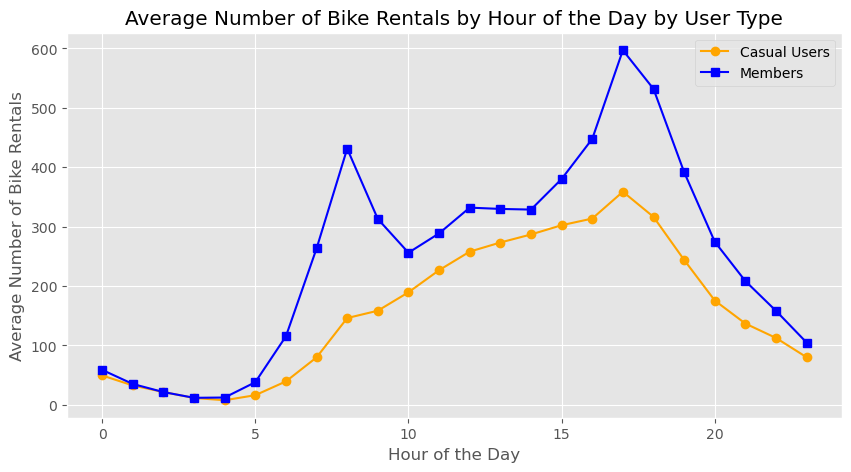

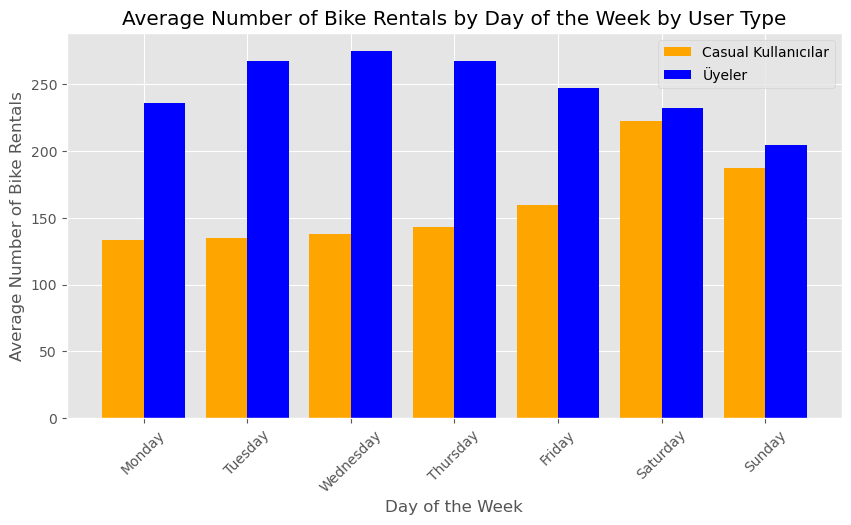

In [17]:
# Öncelikle Date sütununun veri tipini kontrol edelim
df_hourly['Date'] = pd.to_datetime(df_hourly['Date'], errors='coerce')

# Günün saatine göre casual ve üye kullanıcıların ortalama bisiklet kiralama sayısını hesaplayalım
hourly_trends_casual = df_hourly.groupby("Hour")["Casual"].mean()
hourly_trends_member = df_hourly.groupby("Hour")["Member"].mean()

# Saatlik kullanım desenini görselleştirelim (Casual vs. Member)
plt.figure(figsize=(10, 5))
plt.plot(hourly_trends_casual.index, hourly_trends_casual.values, marker='o', linestyle='-', label="Casual Users", color='orange')
plt.plot(hourly_trends_member.index, hourly_trends_member.values, marker='s', linestyle='-', label="Members", color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Bike Rentals")
plt.title("Average Number of Bike Rentals by Hour of the Day by User Type")
plt.legend()
plt.grid(True)
plt.show()

# Haftanın gününe göre casual ve üye kullanıcıların ortalama bisiklet kiralama sayısını hesaplayalım
df_hourly["Day_of_Week"] = df_hourly["Date"].dt.dayofweek  # 0 = Pazartesi, 6 = Pazar
weekly_trends_casual = df_hourly.groupby("Day_of_Week")["Casual"].mean()
weekly_trends_member = df_hourly.groupby("Day_of_Week")["Member"].mean()

# Haftalık kullanım desenini görselleştirelim (Casual vs. Member)
plt.figure(figsize=(10, 5))
plt.bar(weekly_trends_casual.index - 0.2, weekly_trends_casual.values, width=0.4, label="Casual Kullanıcılar", color='orange')
plt.bar(weekly_trends_member.index + 0.2, weekly_trends_member.values, width=0.4, label="Üyeler", color='blue')
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Bike Rentals")
plt.title("Average Number of Bike Rentals by Day of the Week by User Type")
plt.xticks(range(7), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)
plt.legend()
plt.show()


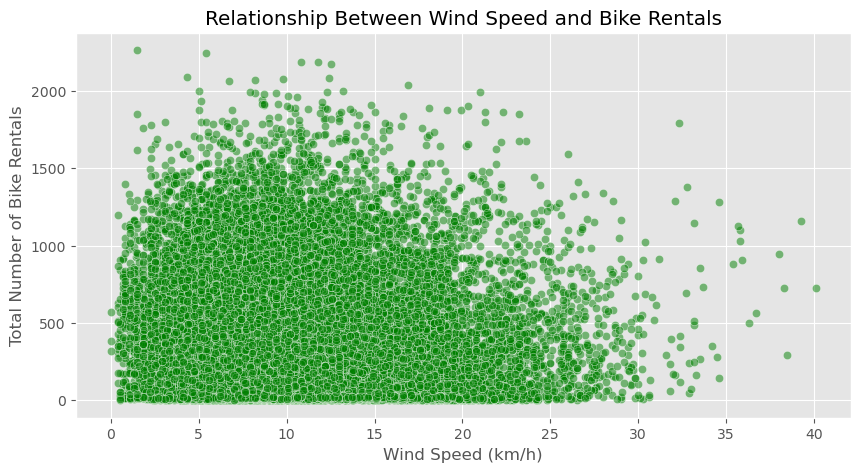

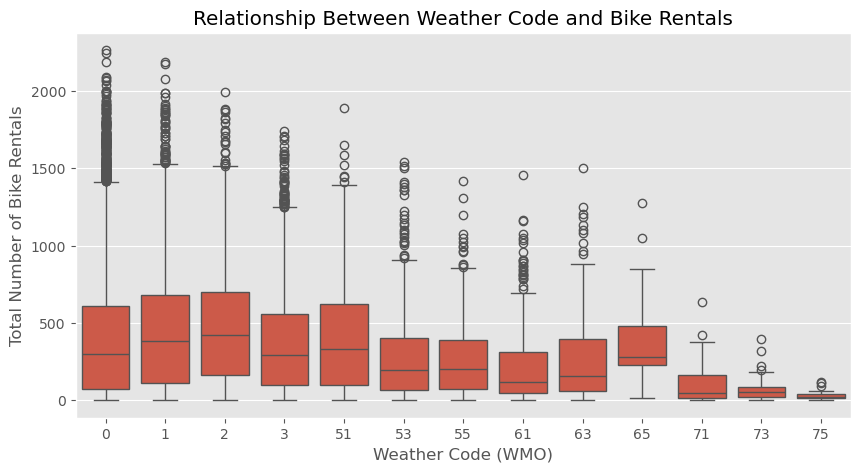

In [18]:
# Hava durumu değişkenleri ile bisiklet kiralama arasındaki ilişkiyi inceleyelim

# 3️⃣ Rüzgar Hızı vs Bisiklet Kiralama
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_hourly["windspeed_10m (km/h)"], y=df_hourly["Total_rides"], alpha=0.5, color='green')
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Total Number of Bike Rentals")
plt.title("Relationship Between Wind Speed and Bike Rentals")
plt.show()

# 4️⃣ Hava Durumu Kodu vs Bisiklet Kiralama
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_hourly["weathercode (wmo code)"], y=df_hourly["Total_rides"])
plt.xlabel("Weather Code (WMO)")
plt.ylabel("Total Number of Bike Rentals")
plt.title("Relationship Between Weather Code and Bike Rentals")
plt.show()

In [19]:
file_path = "/Users/macbookpro13retina/Desktop/CAB/Python/Project_3_Capital_Bike_Share/CBS_2021-2023_Daily_Weather.csv"

df_daily = pd.read_csv(file_path)

df_daily.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [20]:
missing_values_daily = df_daily.isnull().sum()

data_types_daily = df_daily.dtypes

basic_stats_daily = df_daily.describe()

missing_values_daily, data_types_daily, basic_stats_daily

(Casual                            0
 Date                              0
 Member                            0
 Total_rides                       0
 apparent_temperature_mean (°C)    0
 temperature_2m_mean (°C)          0
 weathercode (wmo code)            0
 windspeed_10m_max (km/h)          0
 dtype: int64,
 Casual                              int64
 Date                               object
 Member                              int64
 Total_rides                         int64
 apparent_temperature_mean (°C)    float64
 temperature_2m_mean (°C)          float64
 weathercode (wmo code)              int64
 windspeed_10m_max (km/h)          float64
 dtype: object,
              Casual        Member   Total_rides  \
 count   1095.000000   1095.000000   1095.000000   
 mean    3836.715068   5929.492237   9766.207306   
 std     2114.895305   2419.273171   4129.630135   
 min      174.000000    323.000000    497.000000   
 25%     2122.000000   4292.500000   6741.500000   
 50%     3595.000

In [21]:
# Veri zaten sıralı mı? Kontrol edelim
is_sorted = (df_daily[['Date']].values == df_daily[['Date']].sort_values(by=['Date']).values).all()
print(is_sorted)

True


In [22]:
# Tarih sütununu datetime formatına çevirelim
# df_daily[df_daily['Date'].isna()]
df_daily['Date'] = pd.to_datetime(df_daily['Date'], errors='coerce')

In [23]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 68.6 KB


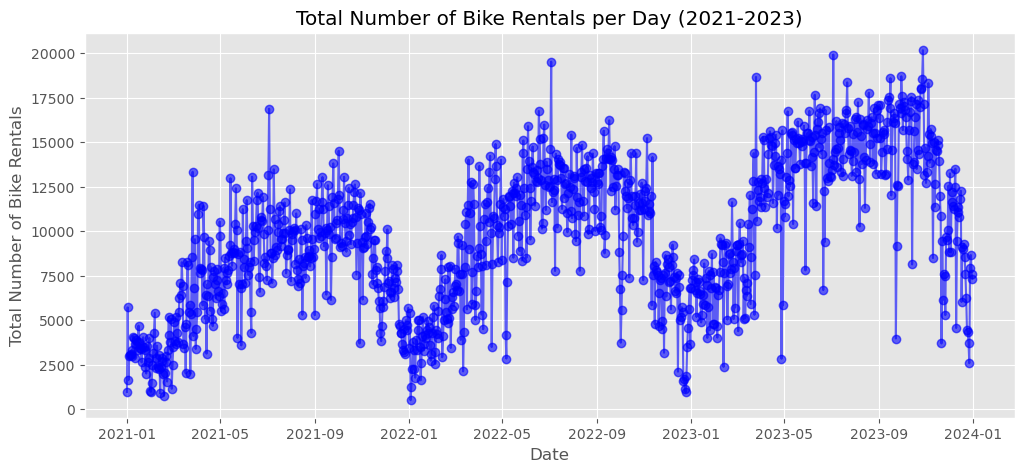

In [24]:
# Günlük toplam bisiklet kiralama sayısının zaman içindeki trendini görselleştirelim
plt.figure(figsize=(12, 5))
plt.plot(df_daily["Date"], df_daily["Total_rides"], marker="o", linestyle="-", color="blue", alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Total Number of Bike Rentals")
plt.title("Total Number of Bike Rentals per Day (2021-2023)")
plt.grid(True)
plt.show()

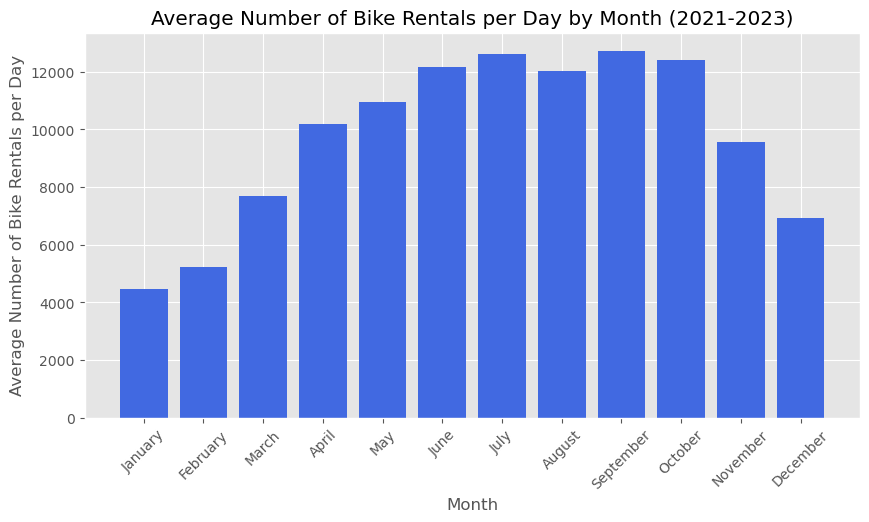

In [25]:
# Öncelikle 'Date' sütunundan ay bilgisini çıkaralım
df_daily["Month"] = df_daily["Date"].dt.month
df_daily["Year"] = df_daily["Date"].dt.year

# Aylık ortalama bisiklet kiralama sayılarını hesaplayalım
monthly_trends = df_daily.groupby("Month")["Total_rides"].mean()

# Aylık kullanım trendlerini görselleştirelim
plt.figure(figsize=(10, 5))
plt.bar(monthly_trends.index, monthly_trends.values, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Average Number of Bike Rentals per Day")
plt.title("Average Number of Bike Rentals per Day by Month (2021-2023)")
plt.xticks(range(1, 13), ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45)
plt.show()

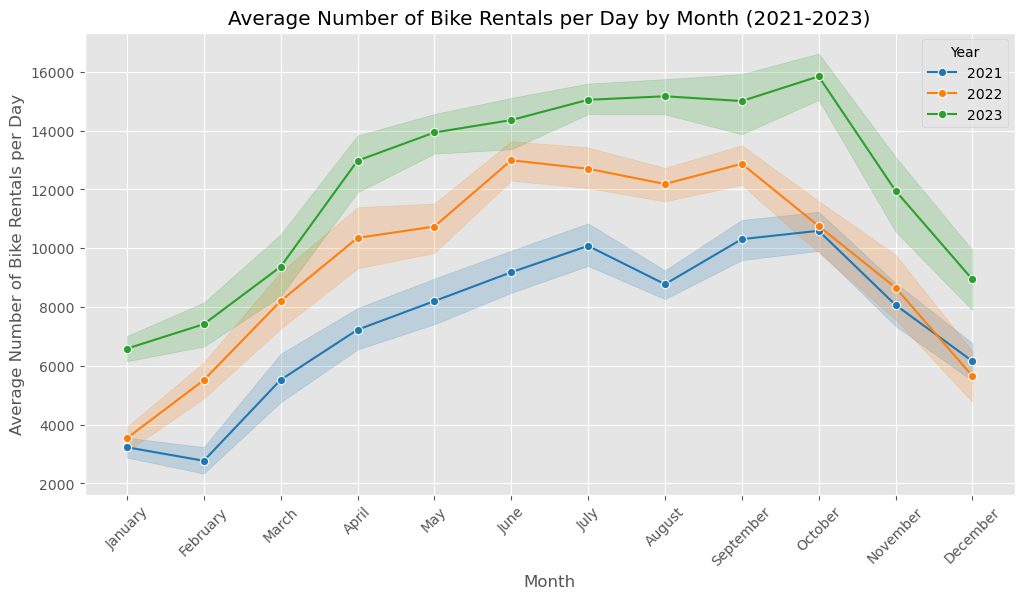

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x="Month", y="Total_rides", hue="Year", marker="o", palette="tab10")
plt.xlabel("Month")
plt.ylabel("Average Number of Bike Rentals per Day")
plt.title("Average Number of Bike Rentals per Day by Month (2021-2023)")
plt.xticks(range(1, 13), ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45)
plt.grid(True)
plt.legend(title="Year")
plt.show()

/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_21831/940505076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_daily, x="Month", y="Total_rides", palette="coolwarm")


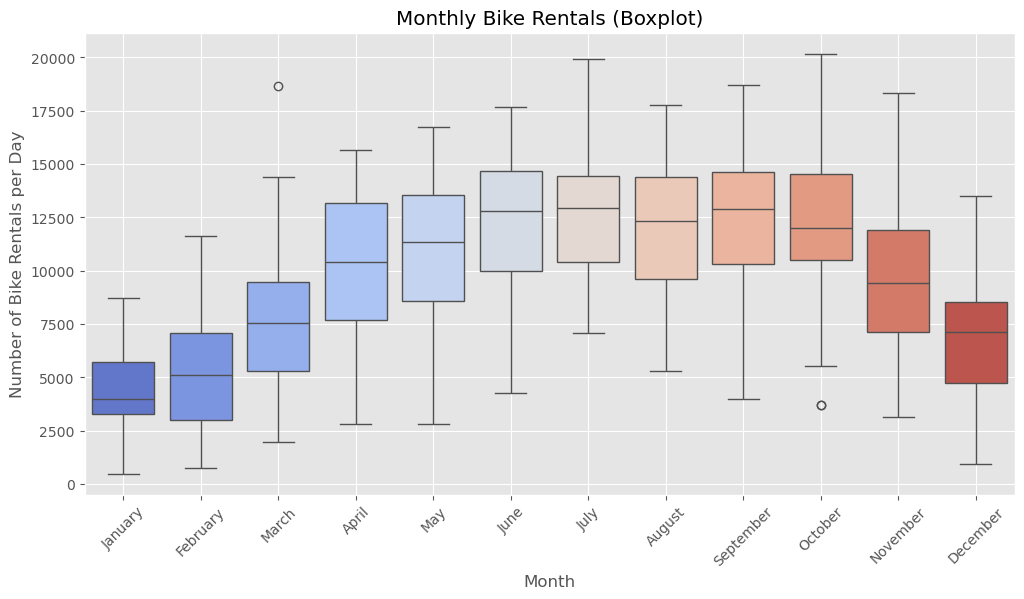

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_daily, x="Month", y="Total_rides", palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Number of Bike Rentals per Day")
plt.title("Monthly Bike Rentals (Boxplot)")
plt.xticks(range(12), ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45)
plt.grid(True)
plt.show()

,Date,Total_rides,Z-score


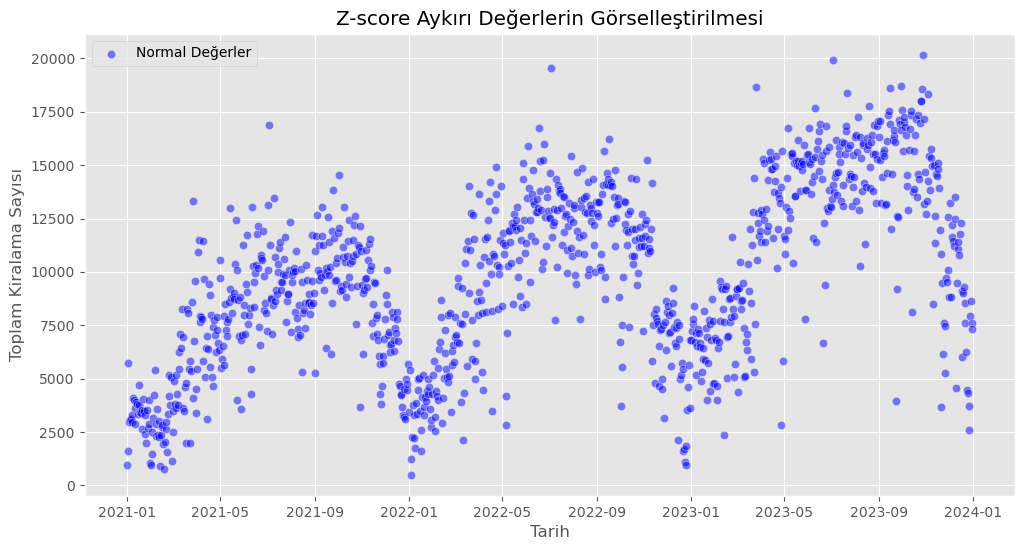

In [28]:
from scipy.stats import zscore

# 1️⃣ Z-score değerlerini hesaplayalım
df_daily["Z-score"] = zscore(df_daily["Total_rides"])

# 2️⃣ Aykırı değerleri belirleyelim (Z-score > 3 veya < -3 olanlar)
z_score_threshold = 3  # Genellikle 3 kullanılır, ancak 2.5 da tercih edilebilir
outliers_z = df_daily[(df_daily["Z-score"].abs() > z_score_threshold)]

# 3️⃣ Aykırı değerleri gösterelim
display(outliers_z[["Date", "Total_rides", "Z-score"]])

# 4️⃣ Aykırı değerleri görselleştirelim (Daha net hale getireceğiz)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_daily, x="Date", y="Total_rides", alpha=0.5, color="blue", label="Normal Değerler")
sns.scatterplot(data=outliers_z, x="Date", y="Total_rides", color="red", marker="X", s=100, edgecolor="black", label="Z-score Aykırı Değerler")
plt.xlabel("Tarih")
plt.ylabel("Toplam Kiralama Sayısı")
plt.title("Z-score Aykırı Değerlerin Görselleştirilmesi")
plt.legend()
plt.show()

In [29]:
outliers_z.shape[0]  # Aykırı değer sayısını göster

0

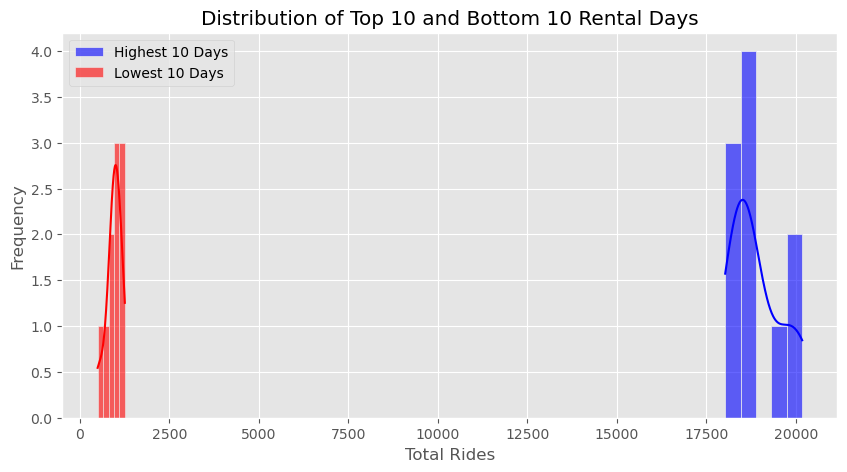

In [30]:
# 1️⃣ En yüksek ve en düşük kiralama yapılan günleri bulalım

# En yüksek 10 gün
top_10_days = df_daily.nlargest(10, "Total_rides")

# En düşük 10 gün
bottom_10_days = df_daily.nsmallest(10, "Total_rides")

# Histogram çizimi
plt.figure(figsize=(10, 5))

# En yüksek 10 gün için histogram (mavi renk, ayrı bin genişliği ile)
sns.histplot(top_10_days["Total_rides"], bins=5, kde=True, color="blue", label="Highest 10 Days", alpha=0.6)

# En düşük 10 gün için histogram (kırmızı renk, ayrı bin genişliği ile)
sns.histplot(bottom_10_days["Total_rides"], bins=5, kde=True, color="red", label="Lowest 10 Days", alpha=0.6)

plt.xlabel("Total Rides")
plt.ylabel("Frequency")
plt.title("Distribution of Top 10 and Bottom 10 Rental Days")
plt.legend()
plt.show()

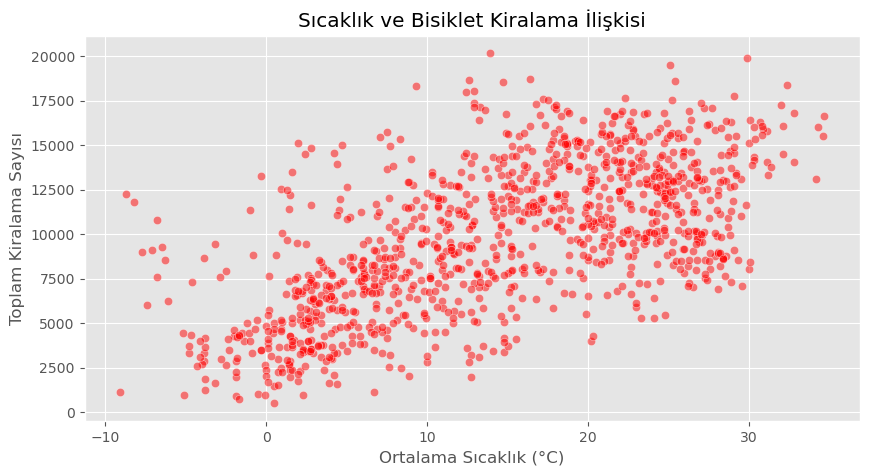

In [31]:

# 2️⃣ Hava durumu değişkenleriyle günlük kiralama arasındaki ilişkiyi analiz edelim

# Sıcaklık vs Kiralama Sayısı (Scatter Plot)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_daily, x="temperature_2m_mean (°C)", y="Total_rides", alpha=0.5, color="red")
plt.xlabel("Ortalama Sıcaklık (°C)")
plt.ylabel("Toplam Kiralama Sayısı")
plt.title("Sıcaklık ve Bisiklet Kiralama İlişkisi")
plt.grid(True)
plt.show()

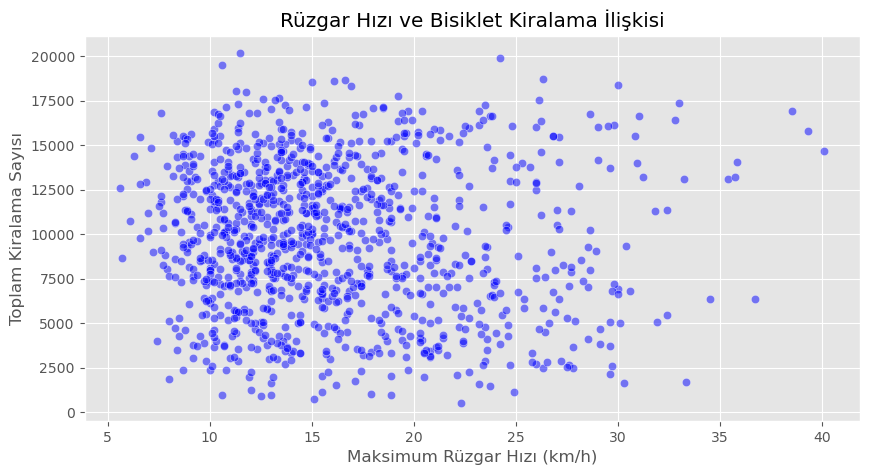

In [32]:
# Rüzgar Hızı vs Kiralama Sayısı (Scatter Plot)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_daily, x="windspeed_10m_max (km/h)", y="Total_rides", alpha=0.5, color="blue")
plt.xlabel("Maksimum Rüzgar Hızı (km/h)")
plt.ylabel("Toplam Kiralama Sayısı")
plt.title("Rüzgar Hızı ve Bisiklet Kiralama İlişkisi")
plt.grid(True)
plt.show()

/var/folders/26/vb0m17rd6l79bj4whypk2rsr0000gn/T/ipykernel_21831/846015118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_daily, x="weathercode (wmo code)", y="Total_rides", palette="coolwarm")


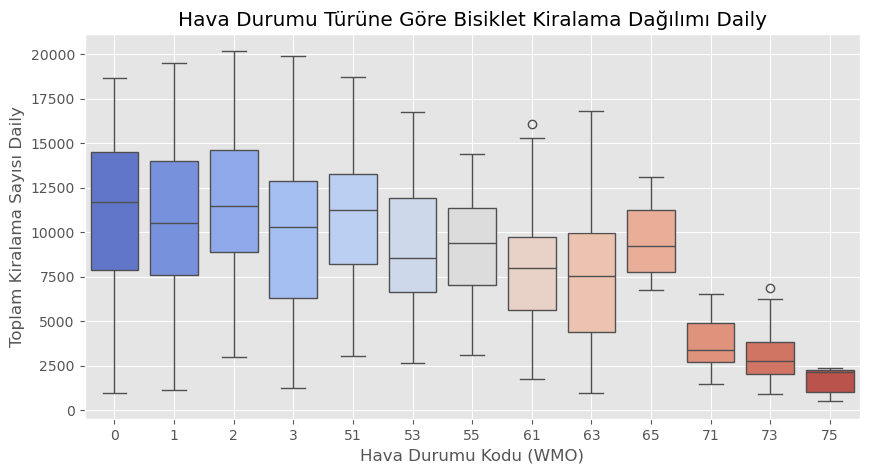

In [33]:
# Hava Durumu Kodu vs Kiralama Sayısı (Boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_daily, x="weathercode (wmo code)", y="Total_rides", palette="coolwarm")
plt.xlabel("Hava Durumu Kodu (WMO)")
plt.ylabel("Toplam Kiralama Sayısı Daily")
plt.title("Hava Durumu Türüne Göre Bisiklet Kiralama Dağılımı Daily")
plt.grid(True)
plt.show()

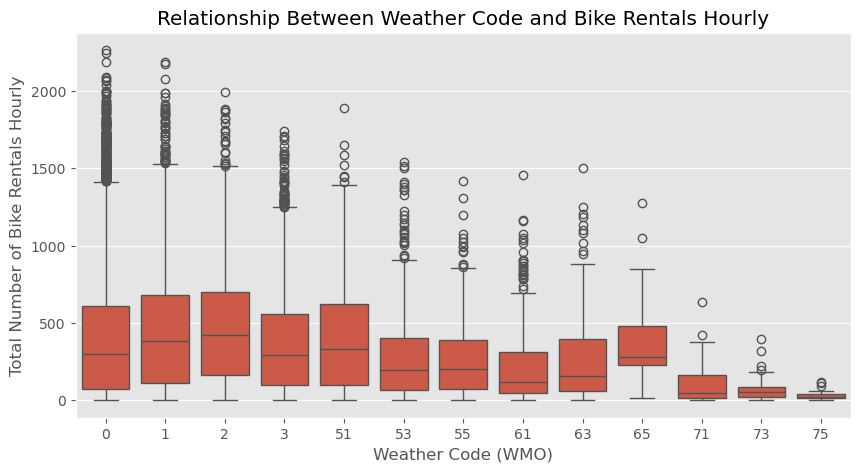

In [34]:
# 4️⃣ Hava Durumu Kodu vs Bisiklet Kiralama
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_hourly["weathercode (wmo code)"], y=df_hourly["Total_rides"])
plt.xlabel("Weather Code (WMO)")
plt.ylabel("Total Number of Bike Rentals Hourly")
plt.title("Relationship Between Weather Code and Bike Rentals Hourly")
plt.show()